In [17]:
# get_ipython().magic(u'matplotlib inline')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import os

# mpl.style.use("classic")
# mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 1.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 1.75
mpl.rcParams["patch.linewidth"] = 1.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 20
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["axes.labelsize"] = "medium"
mpl.rcParams["xtick.labelsize"] = "medium"
mpl.rcParams["ytick.labelsize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

mpl.rcParams["text.usetex"] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}']

print("matplotlib %s" % mpl.__version__)

matplotlib 3.1.0


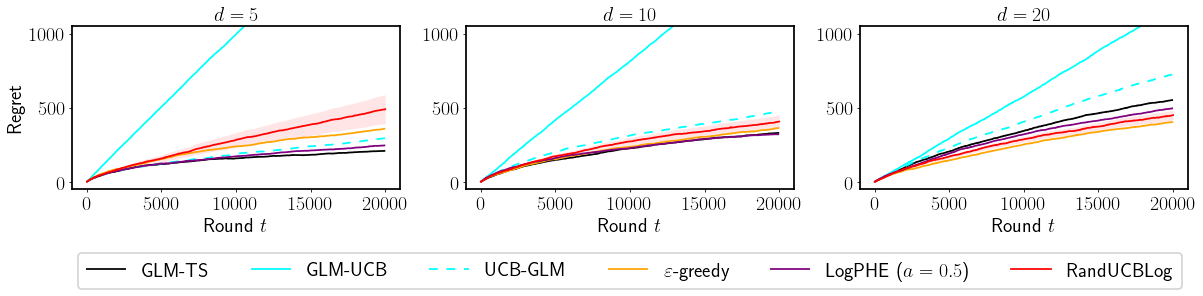

In [18]:
def linestyle2dashes(style):
    if style == 'solid':
        return (0, ())
    elif style == 'dotted':
        return (0, (1, 1))
    elif style == 'loosely dotted':
        return (0, (1, 10))
    elif style == 'densely dotted':
        return (0, (1, 1))
    elif style == 'dashed':
        return (0, (5, 5))
    elif style == 'loosely dashed':
        return (0, (5, 10))
    elif style == 'densely dashed':
        return (0, (5, 1))
    elif style == 'dashdotted':
        return (0, (3, 5, 1, 5))
    elif style == 'loosely dashdotted':
        return (0, (3, 10, 1, 10))
    elif style == 'densely dashdotted':
        return (0, (3, 1, 1, 1))
    elif style == 'dashdotdotted':
        return (0, (3, 5, 1, 5, 1, 5))
    elif style == 'loosely dashdotdotted':
        return (0, (3, 10, 1, 10, 1, 10))
    elif style == 'densely dashdotdotted':
        return (0, (3, 1, 1, 1, 1, 1))

n = 20000

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

environments = [
    ("Bernoulli (d=5)", 5),
    ("Bernoulli (d=10)", 10),
    ("Bernoulli (d=20)", 20)
]

algorithms = [
        # baselines
        ("GLM-TS", "black", "solid", "GLM-TS"),
        ("GLM-UCB", "cyan", "solid", "GLM-UCB"),
        ("UCB-GLM", "cyan", "dashed", "UCB-GLM"),
        ("e-greedy", "orange", "solid", r"$\varepsilon$-greedy"),
        # sota
        ("LogPHE (a = 0.5)", "purple", "solid", r"LogPHE ($a = 0.5$)"),
        # RandUCB
#         ("RandLogUCB", "red", "solid", "RandLogUCB"),
        ("RandUCBLog", "red", ":", "RandUCBLog"),
]

plt.figure(figsize=(20, 3))
for fig_idx, env_def in enumerate(environments):
    env_name, d = env_def[0], env_def[1]
    
    res_dir = os.path.join(".", "Results", "GenLin", env_name)
    
    plt.subplot(1, len(environments), fig_idx + 1)
    for alg_idx, alg_def in enumerate(algorithms):
        alg_name, alg_color, alg_line, alg_label = alg_def[0], alg_def[1], alg_def[2], alg_def[3]
        
        fname = os.path.join(res_dir, alg_name)
        cum_regret = np.loadtxt(fname, delimiter=",")     
        std_regret = cum_regret.std(axis=1) / np.sqrt(cum_regret.shape[1])        
        
        plt.plot(step, cum_regret.mean(axis=1), alg_color, linestyle=linestyle2dashes(alg_line), label=alg_label)
        
#         plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
#                      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
#                      fmt="none", ecolor=alg_color)

    plt.fill_between(step, cum_regret.mean(axis=1) - std_regret,cum_regret.mean(axis=1) + std_regret, color=alg_color, alpha=0.1, linewidth=0)        
    
    plt.title(r"$d = %d$" % d)
    plt.xlabel(r"Round $t$")
    
    plt.ylim(-50, 1050)

    if fig_idx == 0:
        plt.ylabel("Regret")
    if fig_idx == 1:
        plt.legend(loc= 'center', frameon = True, bbox_to_anchor=(0.5,-0.5), fancybox=True, ncol = len(algorithms))
        
plot_dir = os.path.join(".", "Plots", "GenLin")
os.makedirs(plot_dir, exist_ok=True)

fig_name = "benchmarking.pdf"
fname = os.path.join(plot_dir, fig_name)
plt.savefig(fname, format = "pdf", dpi = 1200, bbox_inches="tight")
plt.show()